# Sequence Analysis of DNA using `BioPython`

Building blocks of DNA and RNA:

* `A` Adenine
* `C` Cytosine
* `G` Guanine
* `T` Thymine  
  

* `U` Uracil (in RNA Thymine → Uracil)

#### Create a General DNA sequence

In [1]:
import Bio
from Bio.Seq import Seq

mydna = Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA')
mydna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

#### Create a Specific Sequence (DNA,RNA,Protein)

In [2]:
from Bio.Alphabet import generic_dna,generic_rna,generic_protein

# Create a RNA
rna1 = Seq('AGGCUCUCGUA',generic_rna)
rna1.alphabet

RNAAlphabet()

#### Sequence Manipulation
* Indexing/Slicing
* Join 2 Sequences
* Find a Codon in a sequence
* Count the number of Nucleotides

In [3]:
dna_seq = Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA',generic_dna)
dna_seq[0:3]

Seq('ATT', DNAAlphabet())

In [4]:
# Count the number of G Nucleotides in a sequence
dna_seq.count('GGT')

2

In [5]:
# Find the index/position of G Nucleotides in a sequence
dna_seq.find('G')

6

In [6]:
# Count the number of G Nucleotides in a sequence in that overlap
dna_seq.count_overlap('GGT')

2

#### Sequence Compliments

In [7]:
seq1 = Seq('ATGATCTCGTAA')
seq1

Seq('ATGATCTCGTAA')

In [8]:
seq1.complement()

Seq('TACTAGAGCATT')

#### Transcription to `RNA`
Same base pairs as DNA, but Thymine changes to Uracil `T → U`

In [9]:
# To mrna
print(seq1.__repr__())
print(seq1.transcribe().__repr__())

Seq('ATGATCTCGTAA')
Seq('AUGAUCUCGUAA', RNAAlphabet())


In [10]:
# Transcription to RNA
seq1.transcribe()

Seq('AUGAUCUCGUAA', RNAAlphabet())

In [11]:
seq1.transcribe().translate()

Seq('MIS*', HasStopCodon(ExtendedIUPACProtein(), '*'))

#### Translate to `Protein`

In [12]:
print(seq1.__repr__())

# Translate RNA to protein
seq1.translate()

Seq('ATGATCTCGTAA')


Seq('MIS*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [13]:
mrna = dna_seq.transcribe()

print(repr(dna_seq))
print(repr(mrna))

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', DNAAlphabet())
Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA', RNAAlphabet())


In [14]:
# Translate mRNA to Protein/Amino Acid
mrna.translate()

/root/anaconda3/envs/dna-toolbox/lib/python3.7/site-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('IKGLYLPR*QTNQLSISCRSVL*', HasStopCodon(ExtendedIUPACProtein(), '*'))

#### Stop codons between Proteins
There are 3 STOP codons in the genetic code
`UAG`, `UAA`, and `UGA`.  
These codons signal the end of the polypeptide chain during translation

> Polypeptides are chains of amino acids. Proteins are made up of one or more polypeptide molecules.

In [15]:
# Translate mRNA to Protein/Amino Acid
# Change the symbol for the stop codon
mrna.translate(stop_symbol='@')

Seq('IKGLYLPR@QTNQLSISCRSVL@', HasStopCodon(ExtendedIUPACProtein(), '@'))

In [16]:
# Back Transcribe mRNA to DNA
mrna.back_transcribe()

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', DNAAlphabet())

#### Translate DAN Sequence to `Condon`
> A codon is a sequence of three DNA or RNA nucleotides that corresponds with a specific amino acid or stop signal during protein synthesis.

In [17]:
# Custom Translate
def custom_translate(seq): 
      
    table = { 
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
    } 
    protein ="" 
    if len(seq)%3 == 0: 
        for i in range(0, len(seq), 3): 
            codon = seq[i:i + 3] 
            protein+= table[codon] 
    return protein

In [18]:
# Create a DNA
dna1 = Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA',generic_dna)
dna1

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', DNAAlphabet())

In [19]:
print(dna1[0:15])
custom_translate(dna1[0:15])

ATTAAAGGTTTATAC


/root/anaconda3/envs/dna-toolbox/lib/python3.7/site-packages/Bio/Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


'IKGLY'

In [20]:
from Bio.Data import CodonTable

# CodonTable for DNA
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [21]:
# CodonTable for RNA
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

# Analysis of Covid19 (`SARS-CoV-2`)

GenBank provides a list the SARS-CoV-2 sequences currently available from the Sequence Read Archive (SRA). At the time of writing this there are `2124` Nucleotide Sequences for SARS-CoV-2.

* https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/

The sample in this example is `NC_045512` from China collected in December 2019.

> Nature: `A new coronavirus associated with human respiratory disease in China`  
> Received: 7 January 2020  
> https://doi.org/10.1038/s41586-020-2008-3




In [22]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
for record in SeqIO.parse("../data/MN908947.fna", "fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [24]:
# Read the sequence record in the file
ncov_dna_record = SeqIO.read("../data/MN908947.fna","fasta")
ncov_dna = ncov_dna_record.seq

### 1. `SARS-CoV-2` DNA Sequence

In [25]:
# Display the Nucleotides
ncov_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [26]:
# Length of our sequence
len(ncov_dna)

29903

#### 2. Transcription of DNA to RNA

In [27]:
# Transcribe (DNA to mRNA)
ncov_mRNA = ncov_dna.transcribe()

# Changes Thymine to Uracil
ncov_mRNA

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA', RNAAlphabet())

#### 3. Translation from RNA to Proteins

In [28]:
# Translate to Protein/Amino Acids (mRNA to AA)
ncov_protein = ncov_mRNA.translate()
ncov_protein

/root/anaconda3/envs/dna-toolbox/lib/python3.7/site-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [29]:
# Length of Protein/Amino Acids
len(ncov_protein)

9967

Over the sequence of DNA, we translated each set of _three nucleotides_ (a `codon`), into it's amino acid (protein)
> A codon is a sequence of three DNA or RNA nucleotides that corresponds with a specific amino acid.

In [30]:
# Check if it is true by dividing total length of neucleotides by the number of codons
print(len(ncov_mRNA)/3)
print(len(ncov_protein))

9967.666666666666
9967


#### 4. Find Proteins (Amino Acid chains)

Amino acids are the monomers that make up proteins. Specifically, a protein is made up of one or more linear chains of amino acids, each of which is called a `polypeptide`.

> Stop codons (`UAG`, `UAA`, and `UGA`) between proteins signal the end of the polypeptide chain during translation.


In [31]:
# Find all the amino acids
ncov_amino_acids = ncov_protein.split('*')
print('Total proteins:', len(ncov_amino_acids))

# Print first 5
ncov_amino_acids[:5]

Total proteins: 775


[Seq('IKGLYLPR', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('QTNQLSISCRSVL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('TNFKICVAVTRLHA', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('CTHAV', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('LITNYCR', HasStopCodon(ExtendedIUPACProtein(), '*'))]

#### Create DataFrame of Polypeptide Chains (Proteins)

In [32]:
# Place our Amino Acids into a DataFrame
df = pd.DataFrame({'amino_acids': [str(i) for i in ncov_amino_acids]})
df['length'] = df['amino_acids'].apply(len)
print(df.shape)
df.head()

(775, 2)


,amino_acids,length
0,IKGLYLPR,8
1,QTNQLSISCRSVL,13
2,TNFKICVAVTRLHA,14
3,CTHAV,5
4,LITNYCR,7


In [33]:
# Longest polypeptide chains
df.nlargest(10, 'length')

,amino_acids,length
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
6,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
464,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
539,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
758,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
771,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43


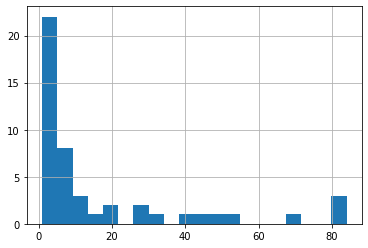

In [34]:
df.length.value_counts().hist(bins=20)

#### What is the Most Abundent Amino Acid?
> Because amino acids can be arranged in many different combinations, it's possible for your body to make thousands of different kinds of proteins from just the same 20/21/22 amino acids.

* Throughout known life, there are 22 genetically encoded (proteinogenic) amino acids, 20 in the standard genetic code and an additional 2 that can be incorporated by special translation mechanisms.   
* In eukaryotes, there are only 21 proteinogenic amino acids, the 20 of the standard genetic code, plus selenocysteine.

In [35]:
aa = pd.Series([c for c in str(ncov_protein)]).value_counts()
print('Different amino acids:', aa.shape[0])
display(aa.head(10))

Different amino acids: 21


L    886
S    810
*    774
T    679
C    635
F    593
R    558
V    548
Y    505
N    472
dtype: int64

## 3D Structure of `SARS-CoV-2`
From `Protein Data Bank` https://www.ncbi.nlm.nih.gov/Structure/pdb/6LU7

Requirements:
```
pip install nglview
pip install py3Dmol

jupyter-nbextension enable nglview --py --sys-prefix

nglview enable
jupyter-labextension install @jupyter-widget/jupyterlab-manager
jupyter-labextension install nglview-js-widgets
```

In [37]:
from Bio.PDB import PDBParser, MMCIFParser

In [48]:
# Reading a PDB File
parser = PDBParser()
covid_structure = parser.get_structure("mmdb_6LU7", "../data/6lu7.pdb")

/root/anaconda3/envs/dna-toolbox/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2842.
  PDBConstructionWarning,


In [49]:
covid_structure

<Structure id=mmdb_6LU7>

In [64]:
# View 3D Structure with nglview
import nglview as nv
view =  nv.show_biopython(covid_structure)
view

NGLWidget()

In [65]:
# View 3D Structure with py3Dmol
import py3Dmol
view1 = py3Dmol.view(query='pdb:6LU7')
view1.setStyle({'cartoon':{'color':'spectrum'}})
view1

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [67]:
view1.render_image()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol